<table style="width:100%">
    <tr>
        <td>
            <a href="http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Appendix_Illustrations/Modular_group.html">
  <img src="../svg/view-html.svg" alt="View HTML"/>
            </a>
        </td>
        <td>
<a href="https://github.com/vvkisil/MoebInv-notebooks/blob/master/Appendix_Illustrations/Modular_group.ipynb">
  <img src="../svg/open-github.svg" alt="Open In GitHub"/>
            </a>
        </td>
        <td>
            <a href="https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Appendix_Illustrations/Modular_group.ipynb">
  <img src="../svg/exec-colab.svg" alt="Run In Colab"/>
            </a>
        </td>
        <td>
            <a href="https://codeocean.com/capsule/7952650/tree">
  <img src="../svg/code-ocean.svg" alt="Code Ocean"/>
            </a>
        </td>
    </tr>
 </table>

# The modular group action
The library allows to build figures out of cycles which are obtained
from each other by means of fraction-linear transformations (FLT). We are going to
illustrate this by the action of the modular group
$\mathrm{SL}_2(\mathbb{Z})$ on a single
circle [1, Section 14.4]. We repeatedly apply FLT $T=
\begin{pmatrix}
  1&1\\0&1
\end{pmatrix}$
for translations and $S=
\begin{pmatrix}
  0&-1\\1&0
\end{pmatrix}$ for the inversion in the unit circle.

First we are loading the library and define the number of iterations.

In [1]:
from figure import *
# If you do not want to use additioanl IPython magic then comment the next line
%load_ext figure
show_asy_off()
steps = 3
trans = 6
epsilon=0.00001 # square of radius for a circle to be ignored

We will use the metric associated to the figure, it can be extracted
by [[get_point_metric]] method.

In [2]:
F = figure()
e = F.get_point_metric();

Firstly, we add to the figure an initial cycle and, then, add new
generations of its shifts and reflections.

In [3]:
a = F.add_cycle(cycle2D([0, numeric(3, 2)], e, numeric(1, 4)), "a")
c = F.add_cycle(cycle2D([0, numeric(11, 6)], e, numeric(1, 36)), "c")

We want to shift all cycles in the previous generation. Their key are grasped by `get_all_keys()` method. Each cycle with the collected key is shifted horizontally by an
integer `t` in range `[-trans, trans]`. This done by `moebius_transform()` relations and it is our responsibility to produce proper Clifford-valued entries to the matrix, see \cite{Kisil05a}*{\S~2.1} for an advise.

In [4]:
for i in range(steps):
    L = F.get_all_keys(2*i, 2*i)
    for ck in L:
        L1 = F.get_cycles(ck) # Each cycle node may have several cycles
        for x in L1 :
            for t in range(-trans, trans+1):
# We shift initial cycles by zero in order to have their copies in the this generation.
                if ((t !=0 or i ==0) \
# To simplify the picture we are skipping circles whose radii 
# would be smaller than the threshold.
                    and (x.det()-(pow(t, 2)-1)*epsilon).evalf() > 0):
                    b = F.add_cycle_rel(moebius_transform(ck, True,  \
                                                           [dirac_ONE(), t*e.subs(e.op(1).op(0)==0), 0, dirac_ONE()]), "%s-%s-%s" % (str(x), i, t) )
# We want the colour of a cycle reflect its generation, smaller cycles
# also need to be drawn by a finer pen. This can be set for each cycle
# by [[set_asy_style]] method, see its description in~\ref{sec:two-dimens-graph} for details.
                    F.set_asy_style(b, "rgb(0,0,%.2f)+%.3f" % (1-1/(i+1.),1/(i+1.5)))
# Similarly, we collect all key from the previous generation cycles
# to make their reflection in the unit circle.
    L = []
    if i < steps-1:
        L = F.get_all_keys(2*i+1,2*i+1)
    for ck in L:
# This time we keep things simple and are using [[sl2_transform]]
# relation, all Clifford algebra adjustments are taken by the
# library. The drawing style is setup accordingly.
        b = F.add_cycle_rel(sl2_transform(ck, True, [0, -1, 1, 0]), "%ss" % str(ck))
        F.set_asy_style(b, "rgb(0, 0.7, %.2f)+%.3f" % (1-1/(i+1.), 1/(i+1.5)))

Finally, we draw the picture. This time we do not want cycles label to appear, thus the last parameter `with_labels` of `asy_write()` is `False`. We also want to reduce the size of \Asymptote\ file and will not print headers of cycles, thus specifying `with_header=True`. The remaining parameters are explicitly assigned their default values.

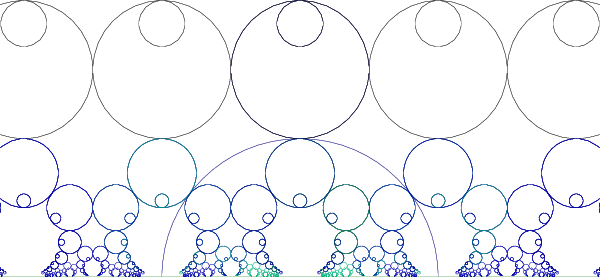

In [5]:
u = F.add_cycle(cycle2D([0, 0], e, numeric(1)), "u")
%asy_write(F,600, -2.17, 2.17, 0, 2, "modular-group", with_labels=False)

## References 

1.  I. Stewart and D. Tall. *Algebraic number theory and Fermat’s last theorem*. A K Peters, Ltd., Natick, MA, Third, 2002.

## Further info:
* [MoebInv library full documentation](https://sourceforge.net/projects/moebinv/files/docs/figure.pdf)
* [MoebInv Home page](http://moebinv.sourceforge.net/)
* [MoebInv  Notebooks](https://github.com/vvkisil/MoebInv-notebooks/blob/master/Table_of_contents.md)
* [MoebInv CodeOcean capsule](https://codeocean.com/capsule/7952650/tree)